### grp

## Hands-On Machine Learning with Scikit-Learn & TensorFlow

## CHAPTER 5: Support Vector Machines

## Support Vector Machines (SVM):
-  supports ...
    -  linear classification
    -  nonlinear classification
    -  linear regression
    -  nonlinear regression
    -  outlier detection
-  ***SVMs are well suited for complex yet small or medium sized datasets***
-  https://en.wikipedia.org/wiki/Support_vector_machine
-  https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python#svm

### objective => fit largest possible "street" between classes while limiting margin violations

## Linear SVM Classification:
-  _fitted solid line_ => ***decision boundary***
-  _widest possible "street" dashed line between classes_ => ***large margin classification***
-  _instances located on dashed line "edge of the street"_ => ***support vectors***

***feature scaling (StandardScaler) helps improve decision boundary looks***

***objective*** => find a good balance between keeping the "street" as large as possible and
limiting the ***_margin violations_*** => (instances in the middle of the street or on wrong side)

-  hard margin classification:
    -  only works if data is linearly separable
    -  quite sensitive to outliers
-  soft margin classification:
    -  use C hyperparameter to control street and margin violations
    -  high C => fewer margin violations but smaller margin
    -  low C => larger margin but more margin violations aka "middle of the street"
    -  ***_reduce C to improve SVM model overfitting_***

## Nonlinear SVM Classification:
-  can add more features such as polynomial features and similarity features to improve nonlinear datasets:
    -  polynomial:
        -  a low polynomial degree has trouble dealing with complex datasets
        -  a high polynomail degree creates a large number of features hence making model perform slow
        -  alternative is the ***_kernel trick_*** => does not add any new polynomial features
    -  similarity:
        -  Gaussian Radial Bass Function that measures how much each instance resembles a particular landmark
        -  alternative is another ***kernel trick*** => does not add any new similarity calculated features

#### Rule of Thumb: always try the linear kernel first; if training set is not too large try the Gaussian RBF kernel as well

## SVM Regression:
-  tries to fit as many instances on the "street" (line) while limiting margin violations (instances off the "street" (line))
-  width of "street" is controlled by epsilon (e)
-  higher e => wide margins
-  lower e => narrow margins

## SVM Under the Hood:
-  b => "bias term"
-  w => "feature weights vector"
-  decision function => w^T * b = w1 x1 + ... wn xn + b
-  if result is positive (decision function >= 0) the predicted class Y is 1; if the result is negative (decision function < 0) the predicted class Y is 0
-  ***the decision boundary (solid line) is the set of points where the decision function = 0***
-  ***the dashed lines represent the points where the decision function is equal to 1 or -1***
-  ***training a linear SVM classifier means finding the value of w and b that make this margin as wide as possible while avoiding margin violations (hard margin) or limiting them (soft margin)***

## _Exercises_

In [1]:
import sklearn
print(sklearn.__version__)

0.20.0


### linear svm

In [2]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width (taking only 2 features)
y = (iris["target"] == 2).astype(np.float64)  # Iris-Virginica (binary yes/no: either iris virginica or not)

svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42)),
    ])

svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=42, tol=0.0001, verbose=0))])

In [3]:
svm_clf.predict([[5.5, 1.7]]) # predict class (0 = not iris virginica; 1 = iris virginica)

array([1.])

### nonlinear svm via polynomial

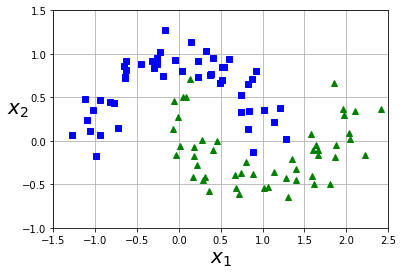

In [4]:
from sklearn.datasets import make_moons
import matplotlib
import matplotlib.pyplot as plt

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [5]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42))
    ])

polynomial_svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('poly_features', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=42, tol=0.0001, verbose=0))])

### kernel trick polynomial

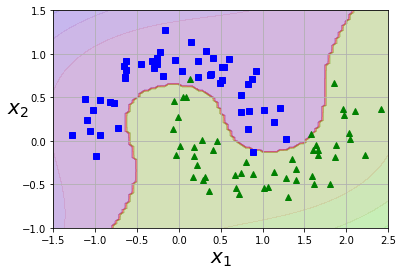

In [6]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

plt.show()

In [7]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
    ])
poly_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=5, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])

In [8]:
poly100_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
    ])
poly100_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=5, cache_size=200, class_weight=None, coef0=100,
  decision_function_shape='ovr', degree=10, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])

In [9]:
# if model overfits reduce polynomial degree
# if model underfits increase polynomial degree

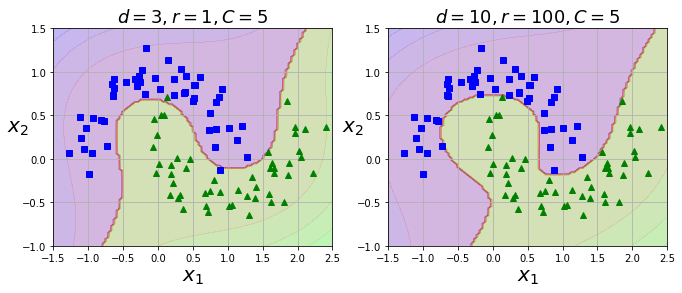

In [10]:
plt.figure(figsize=(11, 4))

plt.subplot(121)
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

plt.subplot(122)
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=18)

plt.show()

### kernel trick similarity

In [11]:
rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
    ])
rbf_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=5, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

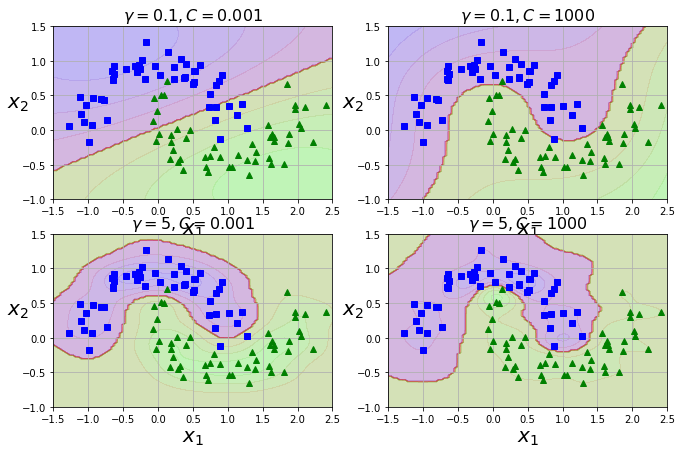

In [12]:
from sklearn.svm import SVC

gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
        ])
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

plt.figure(figsize=(11, 7))

for i, svm_clf in enumerate(svm_clfs):
    plt.subplot(221 + i)
    plot_predictions(svm_clf, [-1.5, 2.5, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)

plt.show()

In [13]:
# y acts like a regularization hyperparamter:
# if model overfits reduce y
# if model underfits increase y

### svm regression

In [14]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5, random_state=42)
svm_reg.fit(X, y)

LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=42, tol=0.0001, verbose=0)

### svm regression via kernel

In [15]:
from sklearn.svm import SVR

svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="auto")
svm_poly_reg.fit(X, y)

SVR(C=100, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='auto',
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

### additional exercises:

https://github.com/ageron/handson-ml/blob/master/05_support_vector_machines.ipynb

1. What is the fundamental idea behind Support Vector Machines?
2. What is a support vector?
3. Why is it important to scale the inputs when using SVMs?
4. Can an SVM classifier output a confidence score when it classifies an instance? What about a probability?
5. Should you use the primal or the dual form of the SVM problem to train a model on a training set with millions of instances and hundreds of features?
6. Say you trained an SVM classifier with an RBF kernel. It seems to underfit the training set: should you increase or decrease γ (gamma)? What about C?
7. How should you set the QP parameters (H, f, A, and b) to solve the soft margin linear SVM classifier problem using an off-the-shelf QP solver?
8. Train a LinearSVC on a linearly separable dataset. Then train an SVC and a SGDClassifier on the same dataset. See if you can get them to produce roughly the same model.
9. Train an SVM classifier on the MNIST dataset. Since SVM classifiers are binary classifiers, you will need to use one-versus-all to classify all 10 digits. You may want to tune the hyperparameters using small validation sets to speed up the process. What accuracy can you reach?
10. Train an SVM regressor on the California housing dataset.

### grp